In [2]:
# Library Imports
import numpy as np 
from copy import deepcopy
import pandas as pd 
import matplotlib.pyplot as plot
import plotly.express as px
import seaborn as sns
import os

### Loading the Dataset - Graduate Admissions 2 ([Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions/code))

In [3]:
# Load Dataset and Show Features 
PATH = './data/' #'/kaggle/input/graduate-admissions/'
dataset = pd.read_csv(PATH + 'Admission_Predict_Ver1.1.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
# Serial Number seems like an irrelevant feature to analyze chances of admit! Let's drop that
dataset.drop(columns=['Serial No.'],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### Sample 10 random data rows

Note the type of data in each feature  
*GRE Score, TOEFL Score, SOP, LOR and CGPA* are **Numerical Features**  
Note however, that GRE and TOEFL scores are *Discrete Numerical* while the rest are *Continuous Numerical*  
*Research and University Rating* are **Categorical Features**  
*Chance of Admit* of course, being a probability is a **Numerical Target**

In [5]:
# Sample 10 random data rows
dataset.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
329,297,96,2,2.5,1.5,7.89,0,0.43
204,298,105,3,3.5,4.0,8.54,0,0.69
361,334,116,4,4.0,3.5,9.54,1,0.93
147,326,114,3,3.0,3.0,9.11,1,0.83
238,310,104,3,2.0,3.5,8.37,0,0.70
462,307,105,4,3.0,3.0,7.94,0,0.62
305,321,109,3,3.5,3.5,8.80,1,0.74
160,315,103,1,1.5,2.0,7.86,0,0.57
475,300,101,3,3.5,2.5,7.88,0,0.59
245,328,110,4,4.0,2.5,9.02,1,0.81


Compute basic statistical parameters on each feature

In [6]:
# Basic Statistics on each feature
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Exploratory Data Analysis
Visualize the dataset.  
Specifically, try to visually view correlations among features and with the target variable to summarize basic characteristics  

A few such visualiation methods are demonstrated

### Correlation Heatmaps
A 2D matrix that represents the statistical measure of linear relationship between two variables  
Put simply, gives a measure of dependence between two different variables

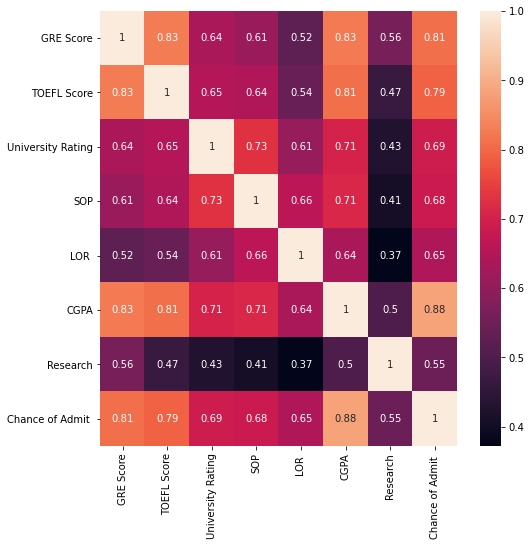

In [7]:
# Plot a Correlation Heatmap
plot.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True, cmap='rocket')

Evidently, the target *Chance of Admit* has the most linear correlation with the following :  

CGPA - 0.88  
GRE Score - 0.81  
TOEFL - 0.79  

The least correlated feature is Research  

### Pairplots
Once again, shows pair-wise correlations among features and with the target variable.  
Only this time, the correlations are visually/qualitatively described

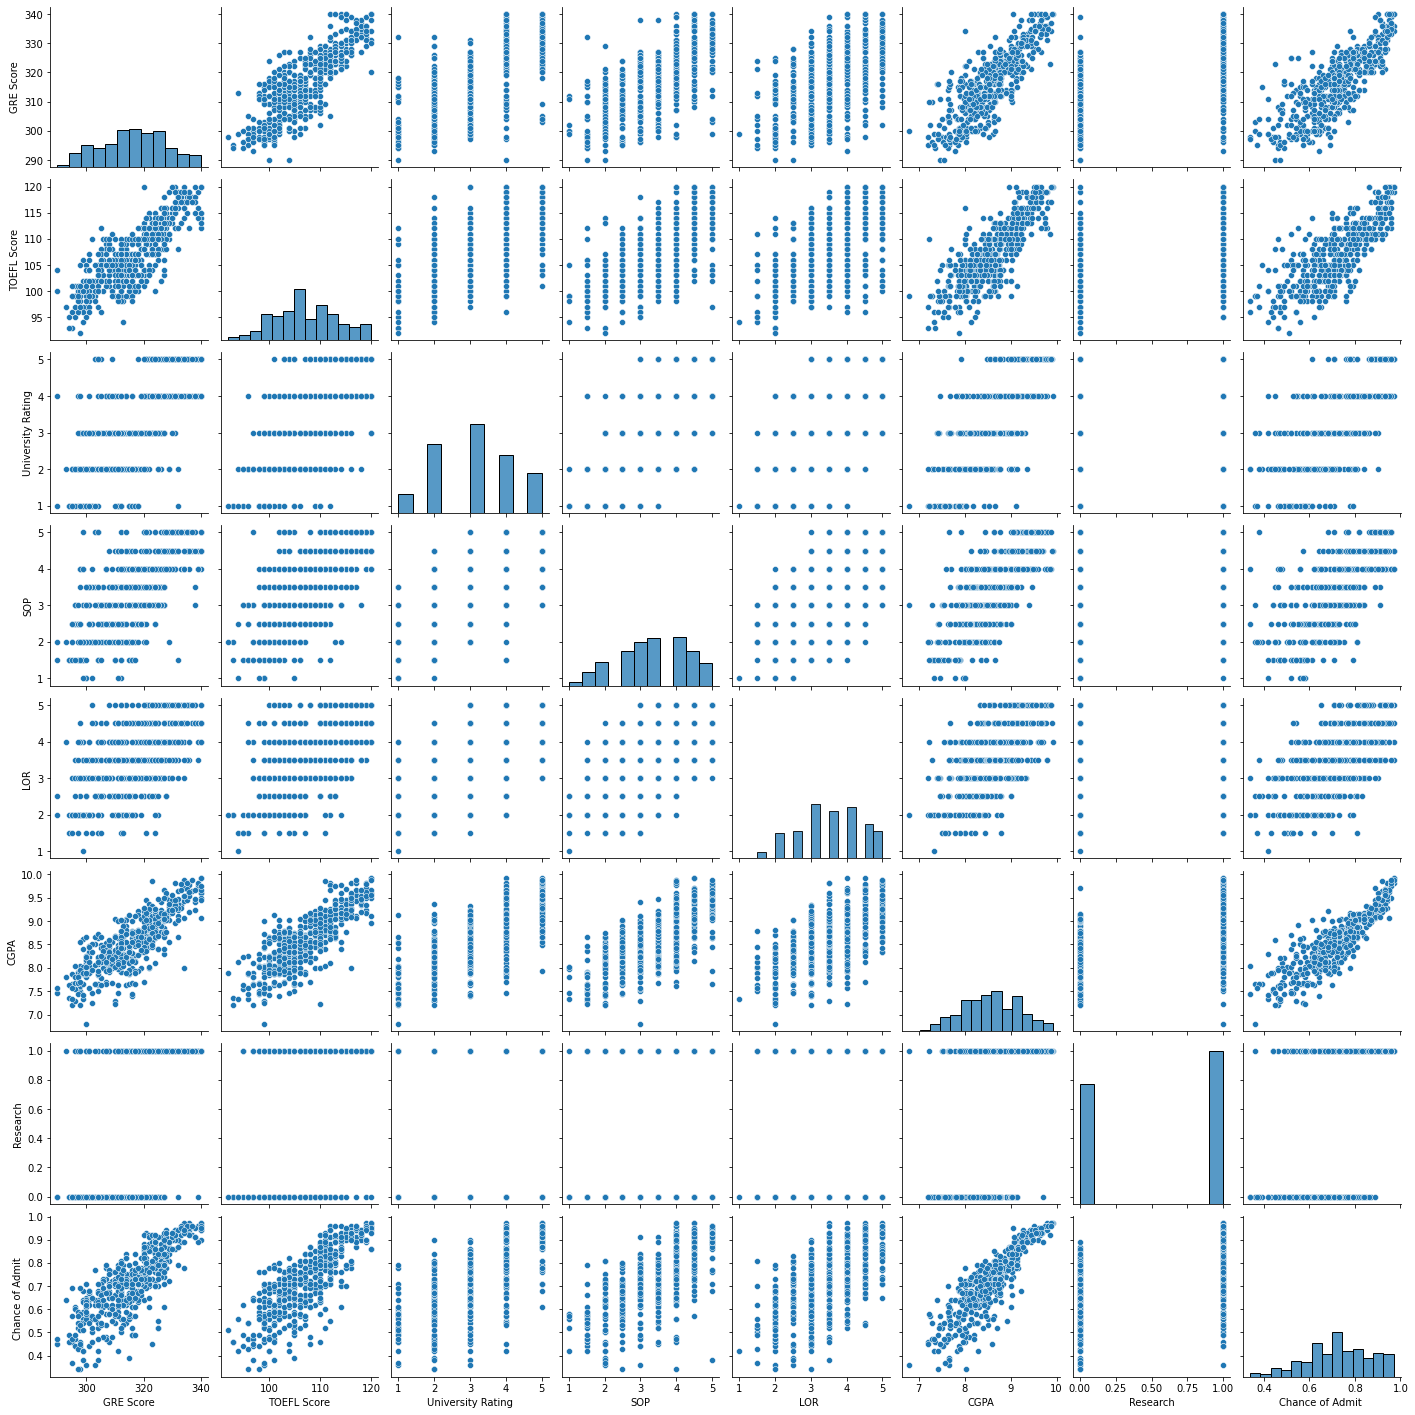

In [7]:
# Plot a correlation pair-plot
sns.pairplot(dataset)

Note the strong positive correlations between test score feature-pairs, namely *GRE Scores, TOEFL Scores and GPA*  
On the contrary, there is relatively weaker association between feature-pairs like *university rating* and *SOP*  

With respect to the target variable *Chance of Admission*, once again test scores show high correlations while there is a weak but existent positive correlation with say, *LOR* and *SOP*

Finally, notice the difference in plots of categorical and continuous features.  
Consider the plots for *University Rating*. The plots exhibit a well defined sptial-boundary perpendicular to its axis.   
Compare this with the plots of a continuos feature like GPA.

### Studying Correlations of Interest

Specific correlations, typically between 2 or 3 features can be studied in detail with the help of a variety of visualization methods.    

As an example, consider the correlation between *university rating* and the *chance of admission*.   
It is clear from previous plots that there is slight, but certain correlation between the two.   

We use a *ViolinPlots* here, to take a look at this   
This is essentially an extension of box-plots to include distribution information about each category

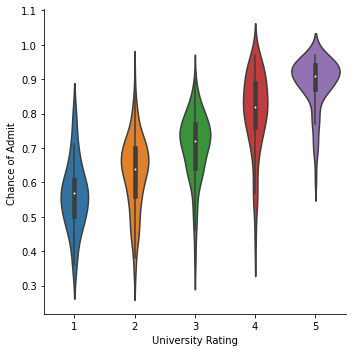

In [8]:
# Plot a correlation "CatPlot"
sns.catplot(x ='University Rating', y='Chance of Admit ', data=dataset , kind="violin" )

Note that both the lateral halves in each "violin" encode the same information. That's just to make the "violin" symmetric!     
The halves represent a distribution of the *number of students with a particular university rating* over *their chances of admit*.       

Consequently, the thickest portion of the violin represents the *most probable* chance of admit for a student with that university rating.   
A long tail on one or both sides implies a less confident estimation of this most probable chance.  

More importantly, the shift of the thick blob towards higher chances from left to right, indicates a better chance of admit for students with a better university rating. A positive correlation that is more clearly evident than before.

## Distribution of Features

Looking at the distributions of values for different features is another common analysis technique.
Importantly, this often helps us find very obvious outliers in the dataset.    
Such data points can be eliminated early on. This can avoid misleading the model to making inaccurate or less confident infernces from our dataset.

In the following plots, we look at the distribution of CGPAs over students

### Box-Plots

Box plots are very effective tools in realizing the statistics of a feature distribution.    
While they may not seem very informative at first sight, they encode five quantities. 
1. **Median** (Quartile 2) - The central vertical Line of the blue box
2. **Quartile 1** - The left vertical line of the blue box
3. **Quartile 3** - The right vertical line of the blue box
4. **Lowest Value** - End of left whisker
5. **Highest Value** - End of right whisker

Essentially, they divide the feature values into 4 parts, each containing 25% of the total data points.      
This can be useful in determing if the data is normally distributed or skewed in one direction.   

The length of the blue-box is the *interquartile range*    
*The two extended lines on either side of the blue-box are called whiskers* 

<AxesSubplot:xlabel='CGPA'>

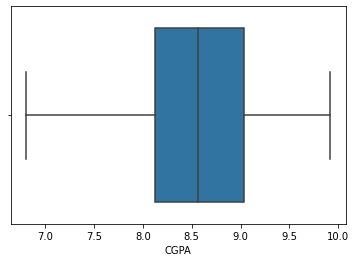

In [9]:
# Plot a box-plot
sns.boxplot(x='CGPA', data=dataset)

### Histograms and Kernel Density Estimate (KDE)

A KDE plot is essentially just a histogram but with smoother edges to make for a more interpretable visualization.     
This smoothing is done using a technique called *kernel smoothing* and hence its name.

The following plot shows the histogram for a feature, along with its KDE plot (in green).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

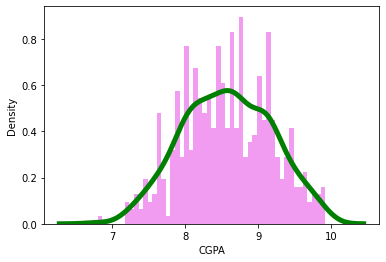

In [10]:
# Plot a KDE and histogram
sns.distplot(
    a=dataset['CGPA'],
    bins=50,
    color='Violet',  
    kde_kws={"color": "g", "lw": 5, "label": "KDE"},
    hist_kws={"linewidth": 5,"alpha": 0.8 }
)

### Visualizing Outliers using Distributions

So far the existence of outliers has not been obvious.   
Here is a scatter plot of the data points along with the box-plot

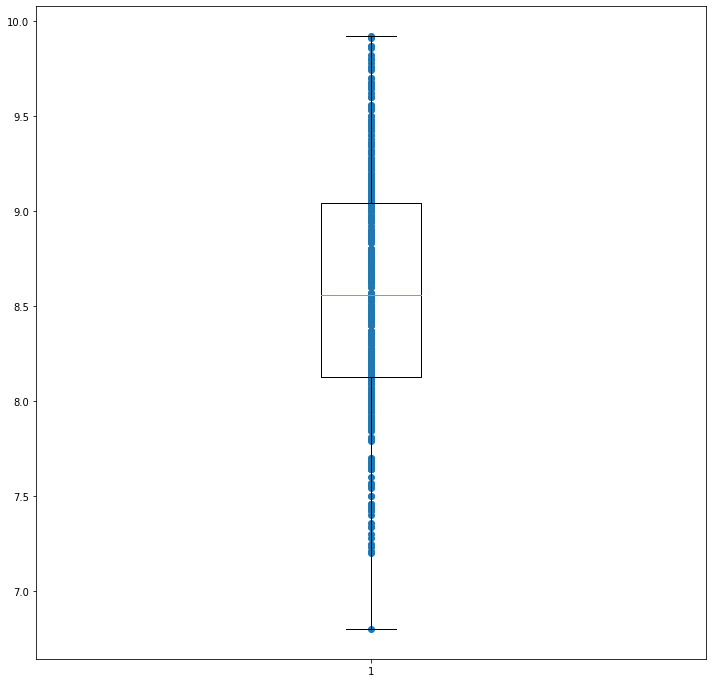

In [11]:
# Scatter + Box-Plot
plot.figure(figsize=(12,12))
plot.boxplot(dataset['CGPA'])
plot.scatter(np.ones(len(dataset)), dataset['CGPA'])

Clearly, some points are much farther away from the general cluster.   
Deciding and eliminating a data point as an outlier required quantitative measurements and not mere visual intuitions.    

One such popular method is the *Z-Score* method with a threshold.    
Without going into the specifics, we find such outliers with a threshold of 2 and visualize them.

In [12]:
# Function to find outliers using Z-Score
def find_outliers(data_pts):
    outliers =[]
    mean = data_pts.mean()
    std = data_pts.std()
    for i in data_pts:
        z = (abs(i-mean))/std
        if z>2:
            outliers.append(i)
    return outliers

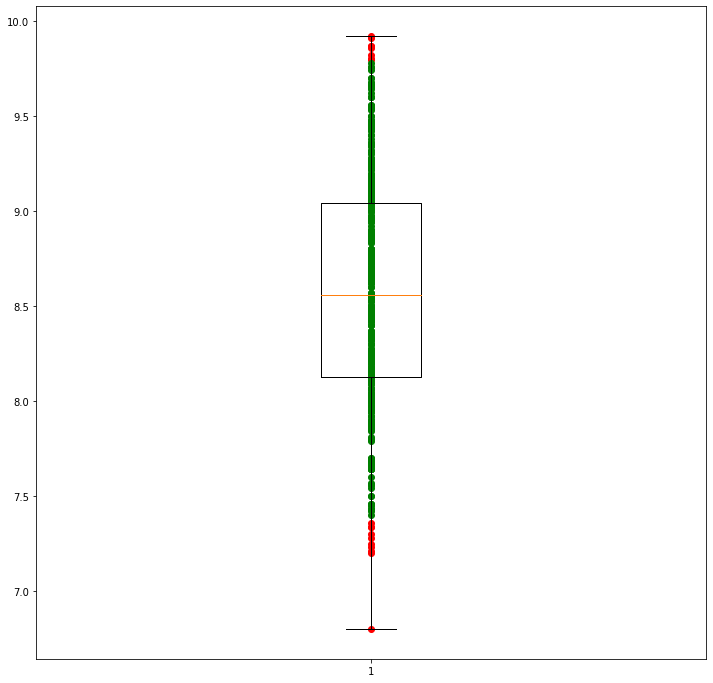

In [13]:
# Visualize Outliers
plot.figure(figsize=(12,12))
plot.boxplot(dataset['CGPA'])
outliers = find_outliers(dataset['CGPA'])
for x,y in zip(np.ones(len(dataset)), dataset['CGPA']):
    if(y in outliers):
        color = 'r'
    else:
        color = 'g'
    plot.scatter(x, y, color=color)

The red points are the outliers found by the Z-Score method.   
More tolerant thresholds (higher values) will eliminate lesser data points as outliers

## Finishing Up

Basic data information and statistics were observed.     
Broadly, two different classes of EDA techniques were discuess among serveral others.    
Visualization and Statistical Analysis are important tools in ML to get an understanding of the data and develop models in an informed approach